<a href="https://colab.research.google.com/github/jx-dohwan/Natural-Language-Processing-using-Transformers/blob/main/CH11_future_direction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install transformers==4.24.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.25.1
    Uninstalling transformers-4.25.1:
      Successfully uninstalled transformers-4.25.1


# 향후 방향
- 새로 부상하고 있는 흥미진진한 분야는 텍스트, 이미지, 오디오 같이 여러 도메인에 걸친 입력을 모델링하는 멀티모달 트랜스포머이다.

## 1. 트랜스포머의 확장
- 

In [5]:
model_data = [
    {'date': '12-06-2017', 'name': 'Transformer', 'size': 213*1e6},
    {'date': '11-06-2018', 'name': 'GPT', 'size': 110*1e6},
    {'date': '11-10-2018', 'name': 'BERT', 'size': 340*1e6},
    {'date': '14-02-2019', 'name': 'GPT-2', 'size': 1.5*1e9},
    {'date': '23-10-2019', 'name': 'T5', 'size': 11*1e9},
    {'date': '17-09-2019', 'name': 'Megatron', 'size': 8.3*1e9},
    {'date': '13-02-2020', 'name': 'Turing-NLG', 'size': 17*1e9},
    {'date': '30-06-2020', 'name': 'GShard', 'size': 600*1e9},
    {'date': '28-05-2020', 'name': 'GPT-3', 'size': 175*1e9},
    {'date': '11-01-2021', 'name': 'Switch-C', 'size': 1.571*10e12},
]

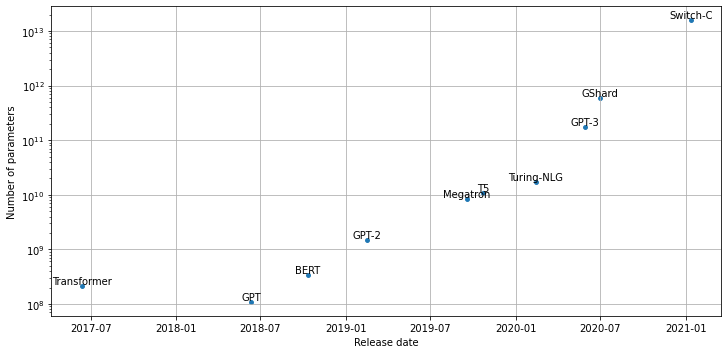

In [6]:
# 중요 트랜스포머 아키텍처의 파라미터 개수
import pandas as pd
import matplotlib.pyplot as plt

def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(
            point["x"],
            point["y"],
            str(point["val"]),
            horizontalalignment="center",
            verticalalignment="bottom",
        )


df_lm = pd.DataFrame.from_records(model_data)
df_lm["date"] = pd.to_datetime(df_lm["date"], dayfirst=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df_lm.plot(x="date", y="size", kind="scatter", s=15, ax=ax)
ax.set_yscale("log")
label_point(df_lm["date"], df_lm["size"], df_lm["name"], ax)
ax.set_xlabel("Release date")
ax.set_ylabel("Number of parameters")
ax.grid(True)
plt.subplots_adjust(top=1.2)
plt.show()
     

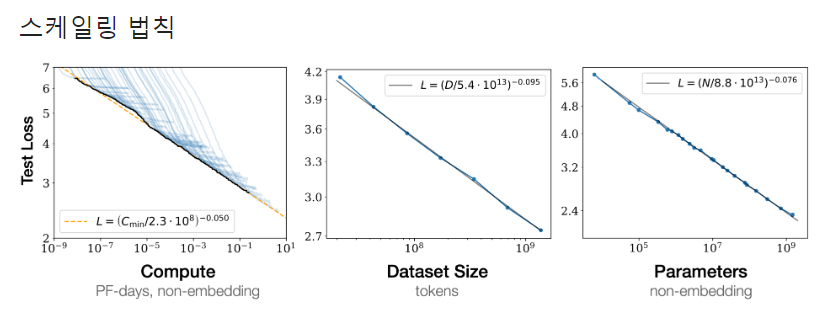

#### 성능과 규모의 관계
- 크기가 고정된 데이터셋에서 성능을 향상하기 위해 구조 변경이나 하이퍼파라미터 최적화애 초점을 맞춘다.
- 하지만 규모의 법칙의 의하면 모델의 크기, 컴퓨팅 예산, 데이터셋 크기를 동시에 증가시키는 것이 더 나은 모델을 만드는 데 생산적이다

#### 거듭 제곱을 법칙
- 테스트 손실 L은 모델의 크기, 컴퓨팅 예산, 데이터셋 크기와 여러 자리수에서 거듭제곱 관계가 있다.
- 이 거듭제곱 법칙은 손실 곡선의 초기 부분 곡선을 연장해서 훈련을 더 오래 수행할 때 얻게 될 손실의 근사치를 추정할 수 있다는 점에서 매력적이다.

#### 샘플 효율성
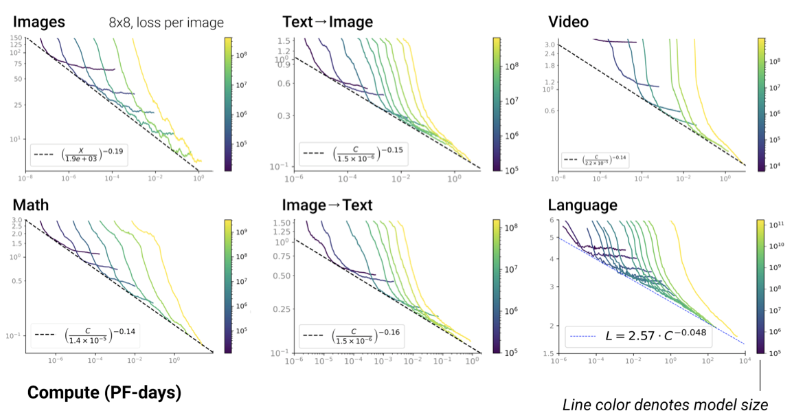

- 대규모 모델은 더 적은 횟수의 훈련 단계로도 소규모 모델과 동일한 성능을 냅니다.
- 일정 횟수의 훈련 단계를 거친 후 손실 곡선이 평탄해지는 영역을 비교함녀 알 수 있다.
- 이 비교는 단순히 모델을 확장한 것에 비해 성능 개선이 크지 않음을 나타낸다.
- 거듭제곱 법칙이 트랜스포머 언어 모델의 일반적인 속성인지 여부는 아직 밝혀지지 않았다.
- 현재로서는 비용이 많이 드는 대규 모델을 명시적으로 훈련하지 않고 성능을 예측하는 도구로 규모의 법칙을 이용한다. 
- 하지만 규모 확장은 말처럼 그렇게 쉽지 않다.

### 2) 규모 확장의 어려움
- 인프라
- 비용
- 데이터셋 큐레이션
- 모델 평가
- 배포
- Big Science
- EleutherAI


### 3) 어텐션 플리즈
- 셀프 어텐션에는 주목할 이슈가 있다.
- 시퀀스에 있는 모든 토큰의 쌍을 비교해 가중치가 생성되므로 트랜스포머를 긴 문서나 음성 처리, 컴퓨터 비전 같은 분야에 적용할 때 셀프 어텐션 층이 계산의 병목지점이 된다.
- 트랜스포머 아키텍처에 있는 셀프 어텐션 층의 시간 복잡도와 공간 복잡도는 대략 (n^2)이다.
- 여기서 n은 시퀀스 길이이다.
- 결과적으로 최근 트랜스포머에 대한 많은 연구는 셀프 어텐션을 더 효율적으로 만드는 데 초점을 둔다.
- 어텐션 메커니즘에 희소성을 추가하거나 어텐션 행렬에 커널을 적용해 어텐션을 효율적으로 만드는 것이 일반적인 패턴이다.
- 희소성을 활용하는 방법으로 시작해서 잘 알려진 몇 가지 방법을 빠르게 살펴보겠다.

### 4) 희소 어텐션
- 셀프 어텐션 층에서 수행되는 계산의 횟수를 줄이는 방법은 미리 정의된 패턴을 따라 생성되는 query-key 쌍의 개수를 제한하는 것이다.
- 논문에서 희소한 패턴을 많이 살펴봤지만 대부분은 몇 개의 기본 패턴으로 분해된다.

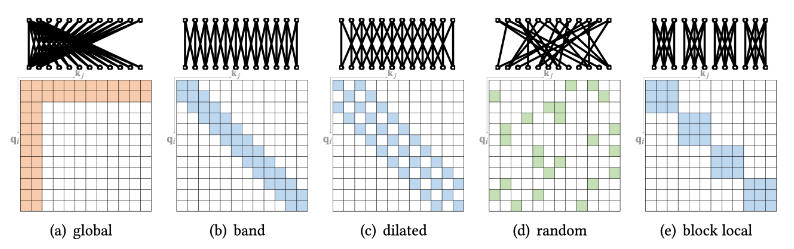

- 글로벌 어텐션
  - 시퀀스에서 다른 모든 토큰에 주의를 기울이는 몇 개의 특수한 토큰을 정의한다.
- 밴드 어텐션
  - 대각선에 걸친 어텐션을 계산합니다.
- 팽창 어텐션
  - 간격을 둔 팿창 윈도를 사용해 일부 쿼리-키 쌍을 건너뛴다.
- 랜덤 어텐션
  - 쿼리마다 몇 개의 키를 랜덤하게 샘플링해 어텐션 점수를 계산한다.
- 블록 로컬 어텐션
  - 시퀀스를 블록으로 나누고 이 블록 안에서 어텐션 점수를 계산한다.


실제로 희소 어텐션을 사용하는 대부분의 트랜스포머 모델은 기본 희소패턴을 혼합해 최종 어텐션 행렬을 만든다.

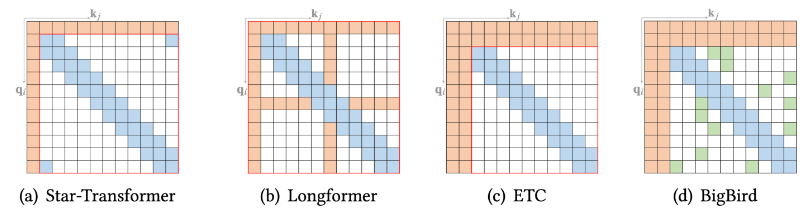

### 5) 선형 어텐션
- 셀프 어텐션을 효율적으로 만드는 또 다른 방법은 어텐션 점수 계산에 관련된 연산의 순서를 바꾸는 것이다.
- 쿼리와 키의 셀프 어텐션 점수를 계산하려면 유사도 함수가 필요하다
- 트랜스포머의 경우 단순한 점곱이다.
- 선형 어텐션 메커니즘의 기본 개념은 유사도 함수를 두 부분으로 나누는 커널 함수로 표현하는 것이다.

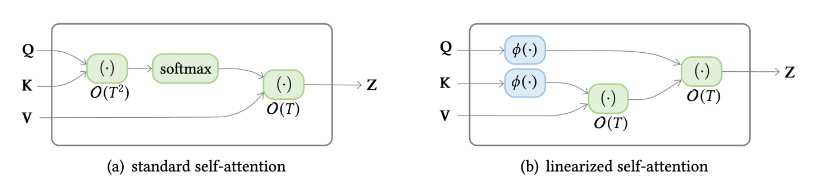

- 이 절에서 일반적인 트랜스포머 아키텍처와 어텐션 메커니즘을 확장해 다양한 작업에서 더 좋은 성능을 달성하는 방법을 알아봤다.
- 다음 절에서는 NLP에서 벗어난 트랜스포머를 오디오와 컴퓨터 비전 같은 도메인에 적용하는 방법을 살펴보겠다.

## 2. 텍스트를 넘어서
- 텍스트를 사용한 언어 모델 훈련과 전이 학습의 조합 방법이 트랜스포머 언어 모델을 성공적으로 이끈 동력이다.
- 텍스트가 풍부하여 대규모 모델의 자기 지도 학습이 가능하다.
- 또한 분류와 질문 답변 같은 텍스트 작업은 보편적이어서 효과적인 전략을 개발해 광범위한 실제 문제를 해결할 수 있다.
하지만 이 방법은 다음과 같은 한계가 있다.
  - 사람이 만든 편향
  - 상식
  - 사실
  - 데이터 형태

> 따라서 데이터 형태의 한계를 극복하면 잠재된 다른 문제도 일부 해결될 것이다. 최근 트랜스포머를 다른 형태의 데이터에 적용하고, 심지어 멀티모달 모델을 만드는 데 많은 진전이 있었다.

### 1) 비전
- 비전은 딥런이 혁명을 촉발한 후 졸곧 합성곱 신경망(cnn)의 전유물이었다.
- 그런데 최근 이 분야에 적용된 트랜스포머가 CNN에 못지 않은 때로는 더 월등한 효율을 달성하기 시작했다.

#### iGPT
- 텍스트를 사용한 GPT 모델의 성공에 영감을 얻어 이와 동일한 방식을 이미지에 적용
- 이미지를 픽셀의 시퀀스로 보고 GPT 아키텍처와 자기회귀 사전 훈련 목표를 사용해 다음 픽셀값을 예측한다.
- 대규모 이미지 데이터셋에서 사전훈련해 이미지를 완성한다. 
- 또 이 모델에 분류헤드를 추가해 분류 작업에 높은 성능을 달성한다.

#### ViT
- 비전을 위해 트랜스포머를 선택한 BERT 스타일 모델이다.
- 먼저 이미지를 작은 패치로 나누고 각 패치를 선형 투영을 통해 임베딩한다.
- 이 결과는 BERT의 토큰 임베딩과 매우 닮았다. 
- 그 다음은 사실상 동일하다 
- 패치 임베딩을 위치 임베딩과 연결해 일반적인 트랜스포머 인코더로 주입힌다.
- 사전훈련하는 동안 일부 패치가 마스킹되거나 왜곡되는데
- 목표는 마스킹된 패치의 평균 컬러를 예측하는 것이다.

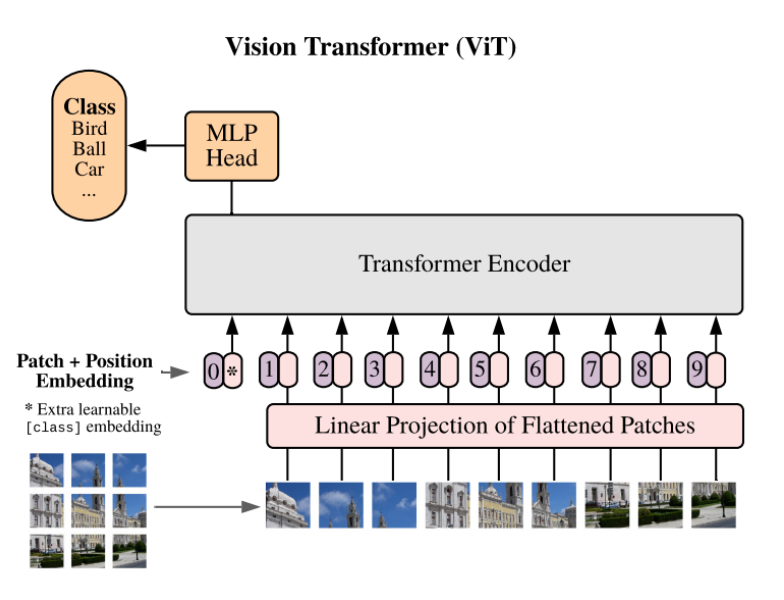

> 이 방식은 기본 ImageNet 데이터셋에서 사전훈련할 때 더 좋은 결과를 냅지 못하짐나 대규모 데이터셋에서 CNN보다 훨씬 더 확장됩니다.

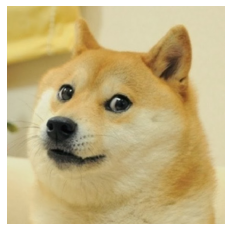

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()
     

In [8]:
import pandas as pd
from transformers import pipeline

image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

,score,label
0,0.643600,"Eskimo dog, husky"
1,0.207405,Siberian husky
2,0.060160,"dingo, warrigal, warragal, Canis dingo"
3,0.035359,"Norwegian elkhound, elkhound"
4,0.012927,"malamute, malemute, Alaskan malamute"


- 이미지 모델을 확장하면 자연스럽게 비디오 모델이 된다.
- 비디오 공간 차원 외에 시간 차원도 가진다.
- 데이터 볼륨이 훨씬 크고 추가 차원을 처리하므로 작업하기가 훨씬 어렵다.
- TimeSformer 같은 모델은 이 두가지를 모두 처리하기 위해 공간과 시간 어텐션 메커니즘을 사용한다.
- 미래에 이런 모델이 비디오 시퀀스 분류나 레입르링 같은 다양한 작업을 위한 도구를 만드는 데 유용할 것이다. 

### 2) 테이블
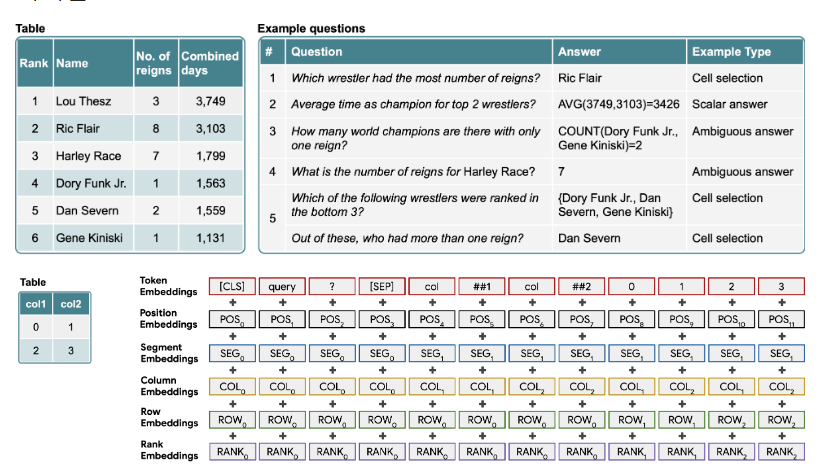

In [9]:

book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12, 
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74, 
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121, 
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141, 
     "end_page": 144}
]

In [10]:

table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table
     

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


In [15]:
!pip install torch-scatter 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
table_qa = pipeline("table-question-answering")

In [ ]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
           "What is the total number of pages?",
           "On which page does the chapter about question-answering start?",
           "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

In [ ]:
for query, pred in zip(queries, preds):
    print(query)
    print("Predicted answer: " + pred["answer"])
    print('='*50)

## 3. 멀티모달 트랜스포머
- TAPAS는 텍스트와 테이블을 결합하기 때문에 멀티모달이지만 테이블은 텍스트로 취급된다.
- 오디오와 텍스트 또는 비전과 텍스트처럼, 두 개의 데이터 형식을 동시에 결합하는 트랜스포머를 알아보겠습니다.

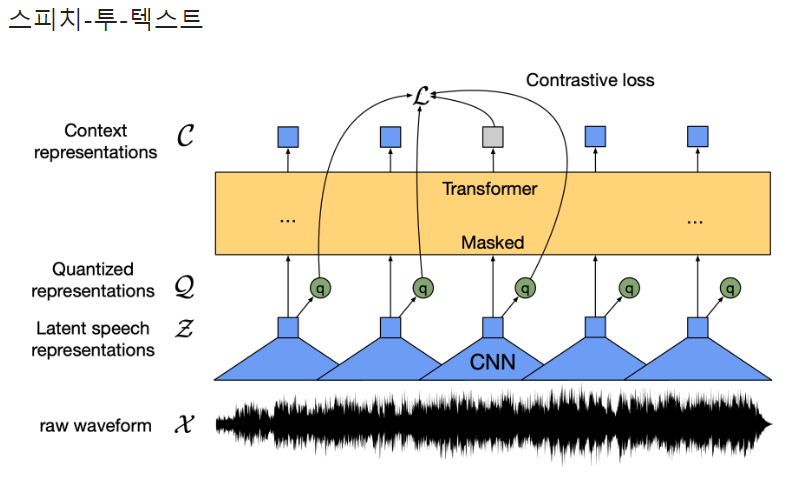

### 3)비전과 텍스트
- VQA : 사진에서 특성을 추출하고 트랜스포머 인코더를 사용해 자연어 질문과 합쳐서 답변을 생성한다.
- LayoutLM : 관심 대상 텍스트 필드를 인식하기 위한 시각 및 레이아웃 정보 추출은 영수증, 송장, 보고서 등 스캔한 비즈니스 문서를 분석하는 분야에 유용하다 LayoutLM 모델은 수백만개의 스캔 문서에서 사전훈련해서 NLP의 BERT와 비슷한 방식으로 다양한 후속작업의 전이학습에 사용할 수 있다.
- DALL E : 생성 작업으 위해 비전과 텍스트를 결합한 모델이다. GPT 아키텍처와 자기회귀 모델링을 사용해 텍스트에서 이미지를생성한다. 
- CLIP : 텍스트와 비전을 결합하지만 지도학습 작업을 위해 고안된 CLIP을 살펴보겠다. 이미지와 캡션의 배치가 샘플링되면 대조 훈련의 목표는 해당 쌍의 임베딩 유사도를 최대화하고 나머지 유사도는 최소화하는 것이다.